In [0]:
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import BatchNormalization
from keras import layers
from keras.utils import plot_model
from keras.layers import Input, Flatten, Dense

In [0]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

In [0]:
trainX.shape, testX.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
trainX = trainX/255.0
testX = testX/255.0

In [0]:
num_classes = 10

In [0]:
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)

In [0]:
input = Input(shape=trainX.shape[1:],name = 'input')

x = Conv2D(filters=32,kernel_size=(3,3))(input)
x = Activation('relu')(x)

x = Conv2D(filters=32,kernel_size=(3,3))(x)
x1 = Activation('relu')(x)

x = Conv2D(filters=32,kernel_size=(1,1))(x1)
x = Activation('relu')(x)

x = layers.add([x,x1])

x = MaxPooling2D((2,2))(x)

x = Conv2D(filters=32,kernel_size=(3,3))(x)
x1 = Activation('relu')(x)

x = Conv2D(filters=32,kernel_size=(1,1))(x1)
x = Activation('relu')(x)

x = layers.add([x,x1])

x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(2018)(x)
x = Activation('relu')(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dense(10)(x)
x = Activation('sigmoid')(x)

model = Model(inputs=input, outputs=x)

In [0]:
model.summary()

Model: "model_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_239 (Conv2D)             (None, 30, 30, 32)   896         input[0][0]                      
__________________________________________________________________________________________________
activation_260 (Activation)     (None, 30, 30, 32)   0           conv2d_239[0][0]                 
__________________________________________________________________________________________________
conv2d_240 (Conv2D)             (None, 28, 28, 32)   9248        activation_260[0][0]             
___________________________________________________________________________________________

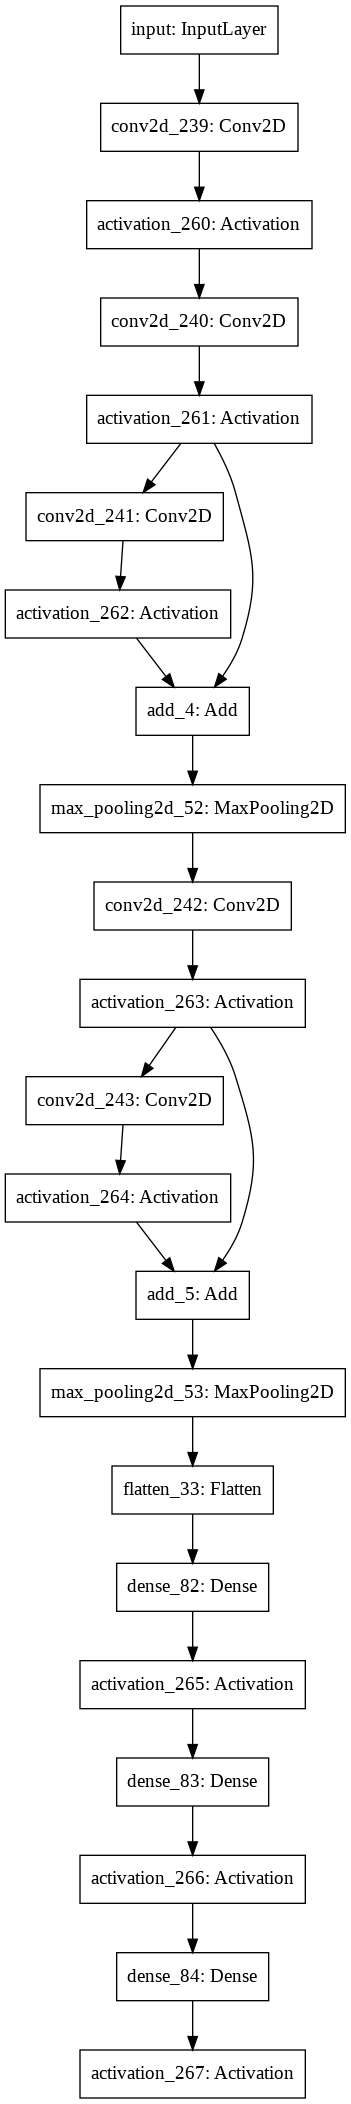

In [0]:
plot_model(model, to_file='model.png')

In [0]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(trainX,trainY,
              epochs=10,
              validation_split=0.1,
              shuffle=True,verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 30s 668us/step - loss: 1.5187 - acc: 0.4487 - val_loss: 1.2634 - val_acc: 0.5498
Epoch 2/10
45000/45000 [==============================] - 24s 544us/step - loss: 1.1007 - acc: 0.6077 - val_loss: 0.9703 - val_acc: 0.6576
Epoch 3/10
45000/45000 [==============================] - 24s 540us/step - loss: 0.8959 - acc: 0.6846 - val_loss: 0.9154 - val_acc: 0.6792
Epoch 4/10
45000/45000 [==============================] - 24s 536us/step - loss: 0.7356 - acc: 0.7401 - val_loss: 0.9237 - val_acc: 0.6826
Epoch 5/10
45000/45000 [==============================] - 24s 537us/step - loss: 0.5953 - acc: 0.7880 - val_loss: 0.9262 - val_acc: 0.6952
Epoch 6/10
45000/45000 [==============================] - 24s 540us/step - loss: 0.4672 - acc: 0.8320 - val_loss: 1.0045 - val_acc: 0.6900
Epoch 7/10
45000/45000 [==============================] - 24s 537us/step - loss: 0.3515 - acc: 0.8737 - val_loss: 1.0

In [0]:
def show_graph(history):
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='red',label='Valid Loss')
  plt.title('Loss')
  plt.legend()
  plt.xlabel('No. of epochs')
  plt.ylabel('Loss')
  plt.show()
  plt.plot(history.history['acc'],color='blue',label='Train Accuracy')
  plt.plot(history.history['val_acc'],color='red',label='Valid Accuracy')
  plt.legend()
  plt.title('Accuracy')
  plt.xlabel('No. of epochs')
  plt.ylabel('Accuracy')
  plt.show()

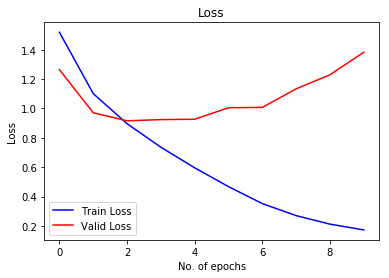

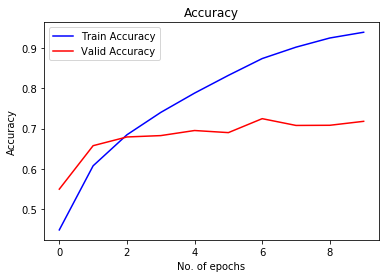

In [0]:
show_graph(history)

In [0]:
test_loss, test_acc = model.evaluate(testX, testY)
test_loss , test_acc

10000/10000 [==============================] - 2s 171us/step


(1.4626855607032776, 0.7066)

In [0]:
input = Input(shape=trainX.shape[1:],name = 'input')

x = Conv2D(filters=32,kernel_size=(3,3))(input)
x = Activation('relu')(x)

x = Conv2D(filters=32,kernel_size=(3,3))(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Conv2D(filters=32,kernel_size=(3,3))(x)
x1 = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(2018)(x)
x = Activation('relu')(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dense(10)(x)
x = Activation('sigmoid')(x)

model = Model(inputs=input, outputs=x)